Task 5: Perform ‘Exploratory Data Analysis’ on the provided dataset
‘SampleSuperstore’
You are the business owner of the retail firm and want to see
how your company is performing. You are interested in finding
out the weak areas where you can work to make more profit.
What all business problems you can derive by looking into the
data?

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#importing the dataset
#url=1lV7is1B566UQPYzzY8R2ZmOritTW299S
path='https://drive.google.com/uc?export=download&id=1lV7is1B566UQPYzzY8R2ZmOritTW299S'
df = pd.read_csv(path)
print("Dataset loaded")

Dataset loaded


In [3]:
#Printing the dataset
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
#Printing the last 5 rows of dataset
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [5]:
#Exploring the dataset
df.shape

(9994, 13)

In [6]:
#Printing the column names
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [7]:
#Describing the dataset
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
#Checking for unique values
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [9]:
#Printing unique values for particular column
df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [10]:
#Checking for null values
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [11]:
#Checking for the duplicate values
df.duplicated().sum()

17

In [12]:
#Dropping the duplicate values
df.drop_duplicates(inplace = True)

In [13]:
#Now checking sum of duplicate values
df.duplicated().sum()

0

Since the sum is 0 we can say that all the duplicate values have been removed from the dataset

In [14]:
#Relationship analysis and visualising the dataset
correlation = df.corr()

<AxesSubplot:>

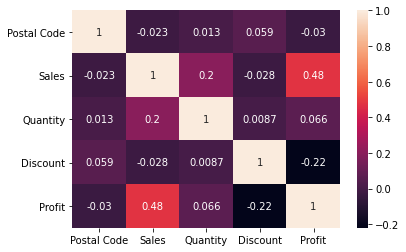

In [15]:
#Heatmap
sns.heatmap(correlation,annot=True)

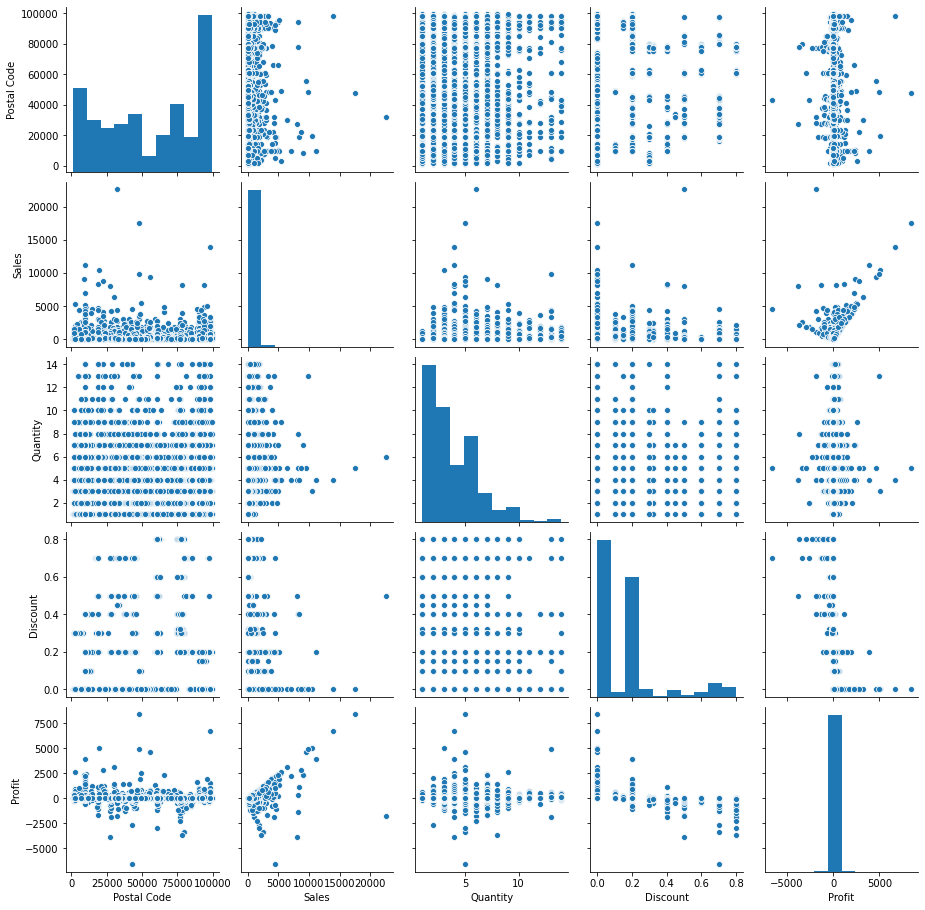

In [16]:
#Pairplot
sns.pairplot(df)

<AxesSubplot:xlabel='Profit'>

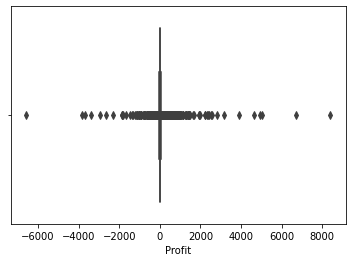

In [17]:
#Boxplot
sns.boxplot(df['Profit'])

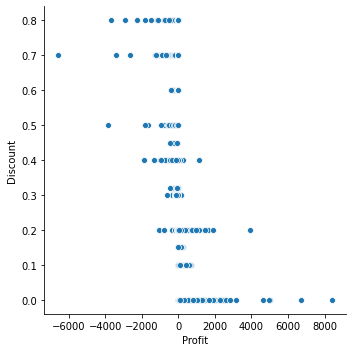

In [18]:
#Relation plot
sns.relplot(x='Profit',y='Discount',data=df)

<AxesSubplot:xlabel='Ship Mode', ylabel='Profit'>

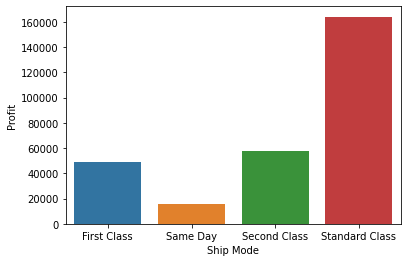

In [19]:
vis = df.groupby(['Ship Mode'], as_index = False)['Profit'].sum()
sns.barplot(vis['Ship Mode'], vis['Profit'])

<AxesSubplot:xlabel='Ship Mode', ylabel='Discount'>

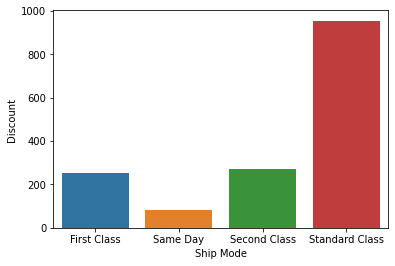

In [20]:
disc = df.groupby(['Ship Mode'], as_index = False)['Discount'].sum()
sns.barplot(disc['Ship Mode'], disc['Discount'])

From above visualization we can state that standard class gives us maximum profit and where more discount is provided profit earned is also more.

<AxesSubplot:xlabel='Profit'>

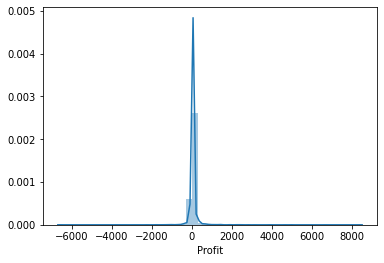

In [21]:
sns.distplot(df['Profit'])

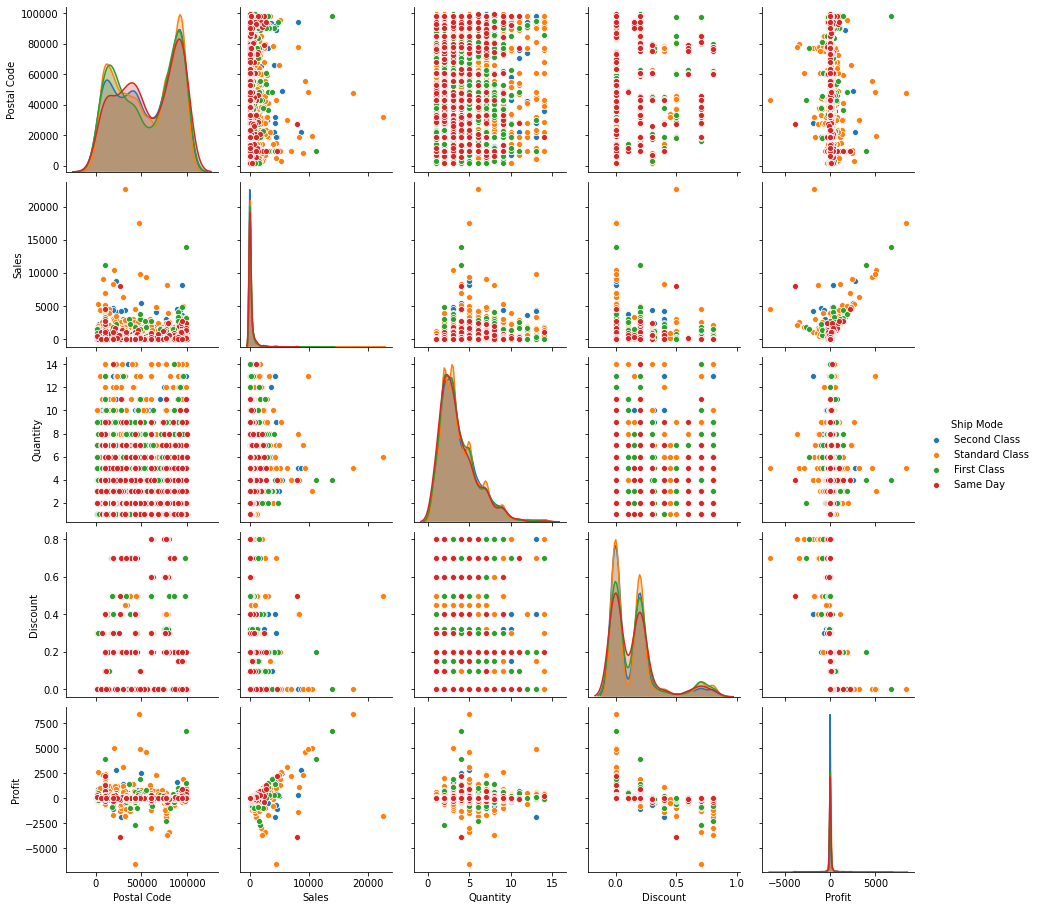

In [22]:
sns.pairplot(df, hue="Ship Mode")

In [24]:
data = df.groupby(['Segment'],as_index = False).sum()
data

,Segment,Postal Code,Sales,Quantity,Discount,Profit
0,Consumer,288269634,1.160833e+06,19497,820.51,134007.4413
1,Corporate,164108306,7.060701e+05,11591,476.85,91954.9798
2,Home Office,97903137,4.292927e+05,6732,261.83,60279.0015


<AxesSubplot:xlabel='Segment', ylabel='Quantity'>

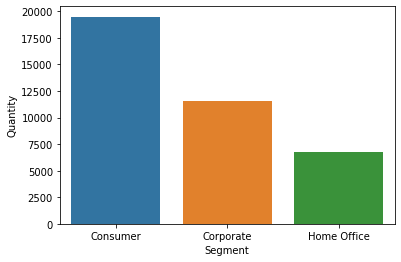

In [25]:
sns.barplot(x = 'Segment', y = 'Quantity', data = data)

In [26]:
#Calculating region wise profit
df.groupby(['Region'], as_index = False, sort = True)['Profit'].mean()

,Region,Profit
0,Central,17.100421
1,East,32.163905
2,South,28.857673
3,West,33.927281


([<matplotlib.patches.Wedge at 0x24e13790>,
 [Text(0.975828498842488, 0.5076994591752255, 'Central'),
  Text(-0.3151626058958701, 1.053884496443953, 'East'),
  Text(-0.9991133210878052, -0.46018753962368053, 'South'),
  Text(0.6398393399820633, -0.8947656782707515, 'West')],
 [Text(0.5322700902777207, 0.2769269777319412, '15.27%'),
  Text(-0.17190687594320186, 0.5748460889694289, '28.71%'),
  Text(-0.54497090241153, -0.2510113852492803, '25.78%'),
  Text(0.3490032763538527, -0.48805400632950074, '30.24%')])

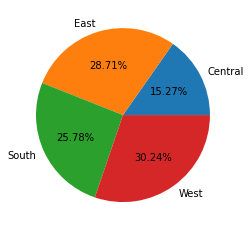

In [28]:
#Pie chart
region = ['Central', 'East', 'South', 'West']
profit = [17.093, 32.135, 28.858, 33.849]
plt.pie(profit, labels = region, autopct='%1.2f%%')

The maximum profit is coming from western region

<AxesSubplot:xlabel='Discount', ylabel='Profit'>

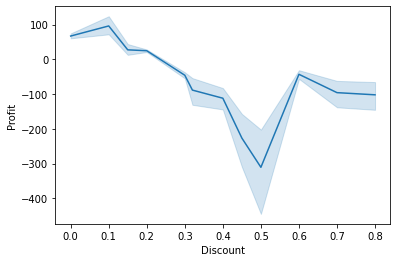

In [29]:
sns.lineplot(y = 'Profit', x = 'Discount', data = df)

From above we can conclude that if discount is increased the profit is decreased

Conclusion:
1.Evaluating the different regions the East region has the highest profit while Central region has lowest Profit.
2.The Consumer segment purchases more quantity while home office segment purchases least quantity.
3.The Standard Class is Earning the more Profit as it is offering more Discounts and having huge sales then other classes.
